# Instalación de dependencias

In [23]:
!pip install pandas 
!pip install matplotlib 
!pip install seaborn
!pip install numpy
!pip install scikit-learn
!pip install --upgrade scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

## Lectura dataset

In [24]:
file_name = 'data.csv'
df = pd.read_csv(file_name)

## Análisis del dataset

In [25]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,NaN,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2109 non-null   float64
 1   Gender                          2101 non-null   object 
 2   Height                          2109 non-null   float64
 3   Weight                          2099 non-null   float64
 4   CALC                            2104 non-null   object 
 5   FAVC                            2103 non-null   object 
 6   FCVC                            2108 non-null   float64
 7   NCP                             2109 non-null   float64
 8   SCC                             2104 non-null   object 
 9   SMOKE                           2105 non-null   object 
 10  CH2O                            2109 non-null   float64
 11  family_history_with_overweight  2103 non-null   object 
 12  FAF                             21

In [27]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2109.000000  2109.000000  2099.000000  2108.000000  2109.000000   
mean     24.234991     1.695159    86.597521     2.412865     2.679495   
std       6.466022     0.140099    26.195882     0.545781     0.788307   
min       0.000000     0.000000    39.000000     0.000000     0.000000   
25%      19.885655     1.629194    65.956344     2.000000     2.656588   
50%      22.758998     1.700164    83.000000     2.373567     3.000000   
75%      26.000000     1.768231   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2109.000000  2103.000000  2106.000000  
mean      2.003417     1.009784     0.657405  
std       0.618957     0.850494     0.609420  
min       0.000000     0.000000     0.000000  
25%       1.568476     0.124505     0.000000  
50%       2.000000     1.000000     0.625215  
75% 

Age                                2
Gender                            10
Height                             2
Weight                            12
CALC                               7
FAVC                               8
FCVC                               3
NCP                                2
SCC                                7
SMOKE                              6
CH2O                               2
family_history_with_overweight     8
FAF                                8
TUE                                5
CAEC                               7
MTRANS                             6
NObeyesdad                         0
dtype: int64
Age                               6
Gender                            0
Height                            8
Weight                            0
CALC                              0
FAVC                              0
FCVC                              5
NCP                               5
SCC                               0
SMOKE                             

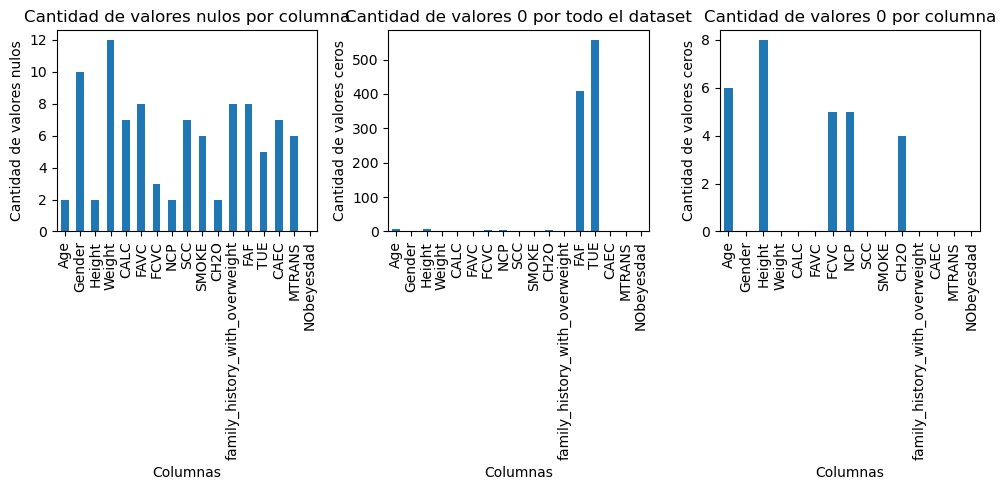

In [28]:
null_values = df.isnull().sum()
no_eval_cols = ['TUE', 'FAF']
columnas_para_calcular = [col for col in df.columns if col not in no_eval_cols]
zero_values = (df[columnas_para_calcular] == 0).sum()
complete_zero_values = (df == 0).sum()
print(null_values)
print(zero_values)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

null_values.plot(kind='bar', ax=ax1)
ax1.set_title('Cantidad de valores nulos por columna')
ax1.set_xlabel('Columnas')
ax1.set_ylabel('Cantidad de valores nulos')

complete_zero_values.plot(kind='bar', ax=ax2)
ax2.set_title('Cantidad de valores 0 por todo el dataset')
ax2.set_xlabel('Columnas')
ax2.set_ylabel('Cantidad de valores ceros')

zero_values.plot(kind='bar', ax=ax3)
ax3.set_title('Cantidad de valores 0 por columna')
ax3.set_xlabel('Columnas')
ax3.set_ylabel('Cantidad de valores ceros')

plt.tight_layout()
plt.show()



In [29]:
print(df.shape)
categorical_cols = [cols for cols in df if df[cols].dtype == 'object']
numeric_cols = [cols for cols in df if df[cols].dtype == 'float64']
print(categorical_cols, '\n')
print(numeric_cols, '\n')

(2111, 17)
['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'] 

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 



### Relación de variables con las variables categóricas y variable objetivo

<function matplotlib.pyplot.show(close=None, block=None)>

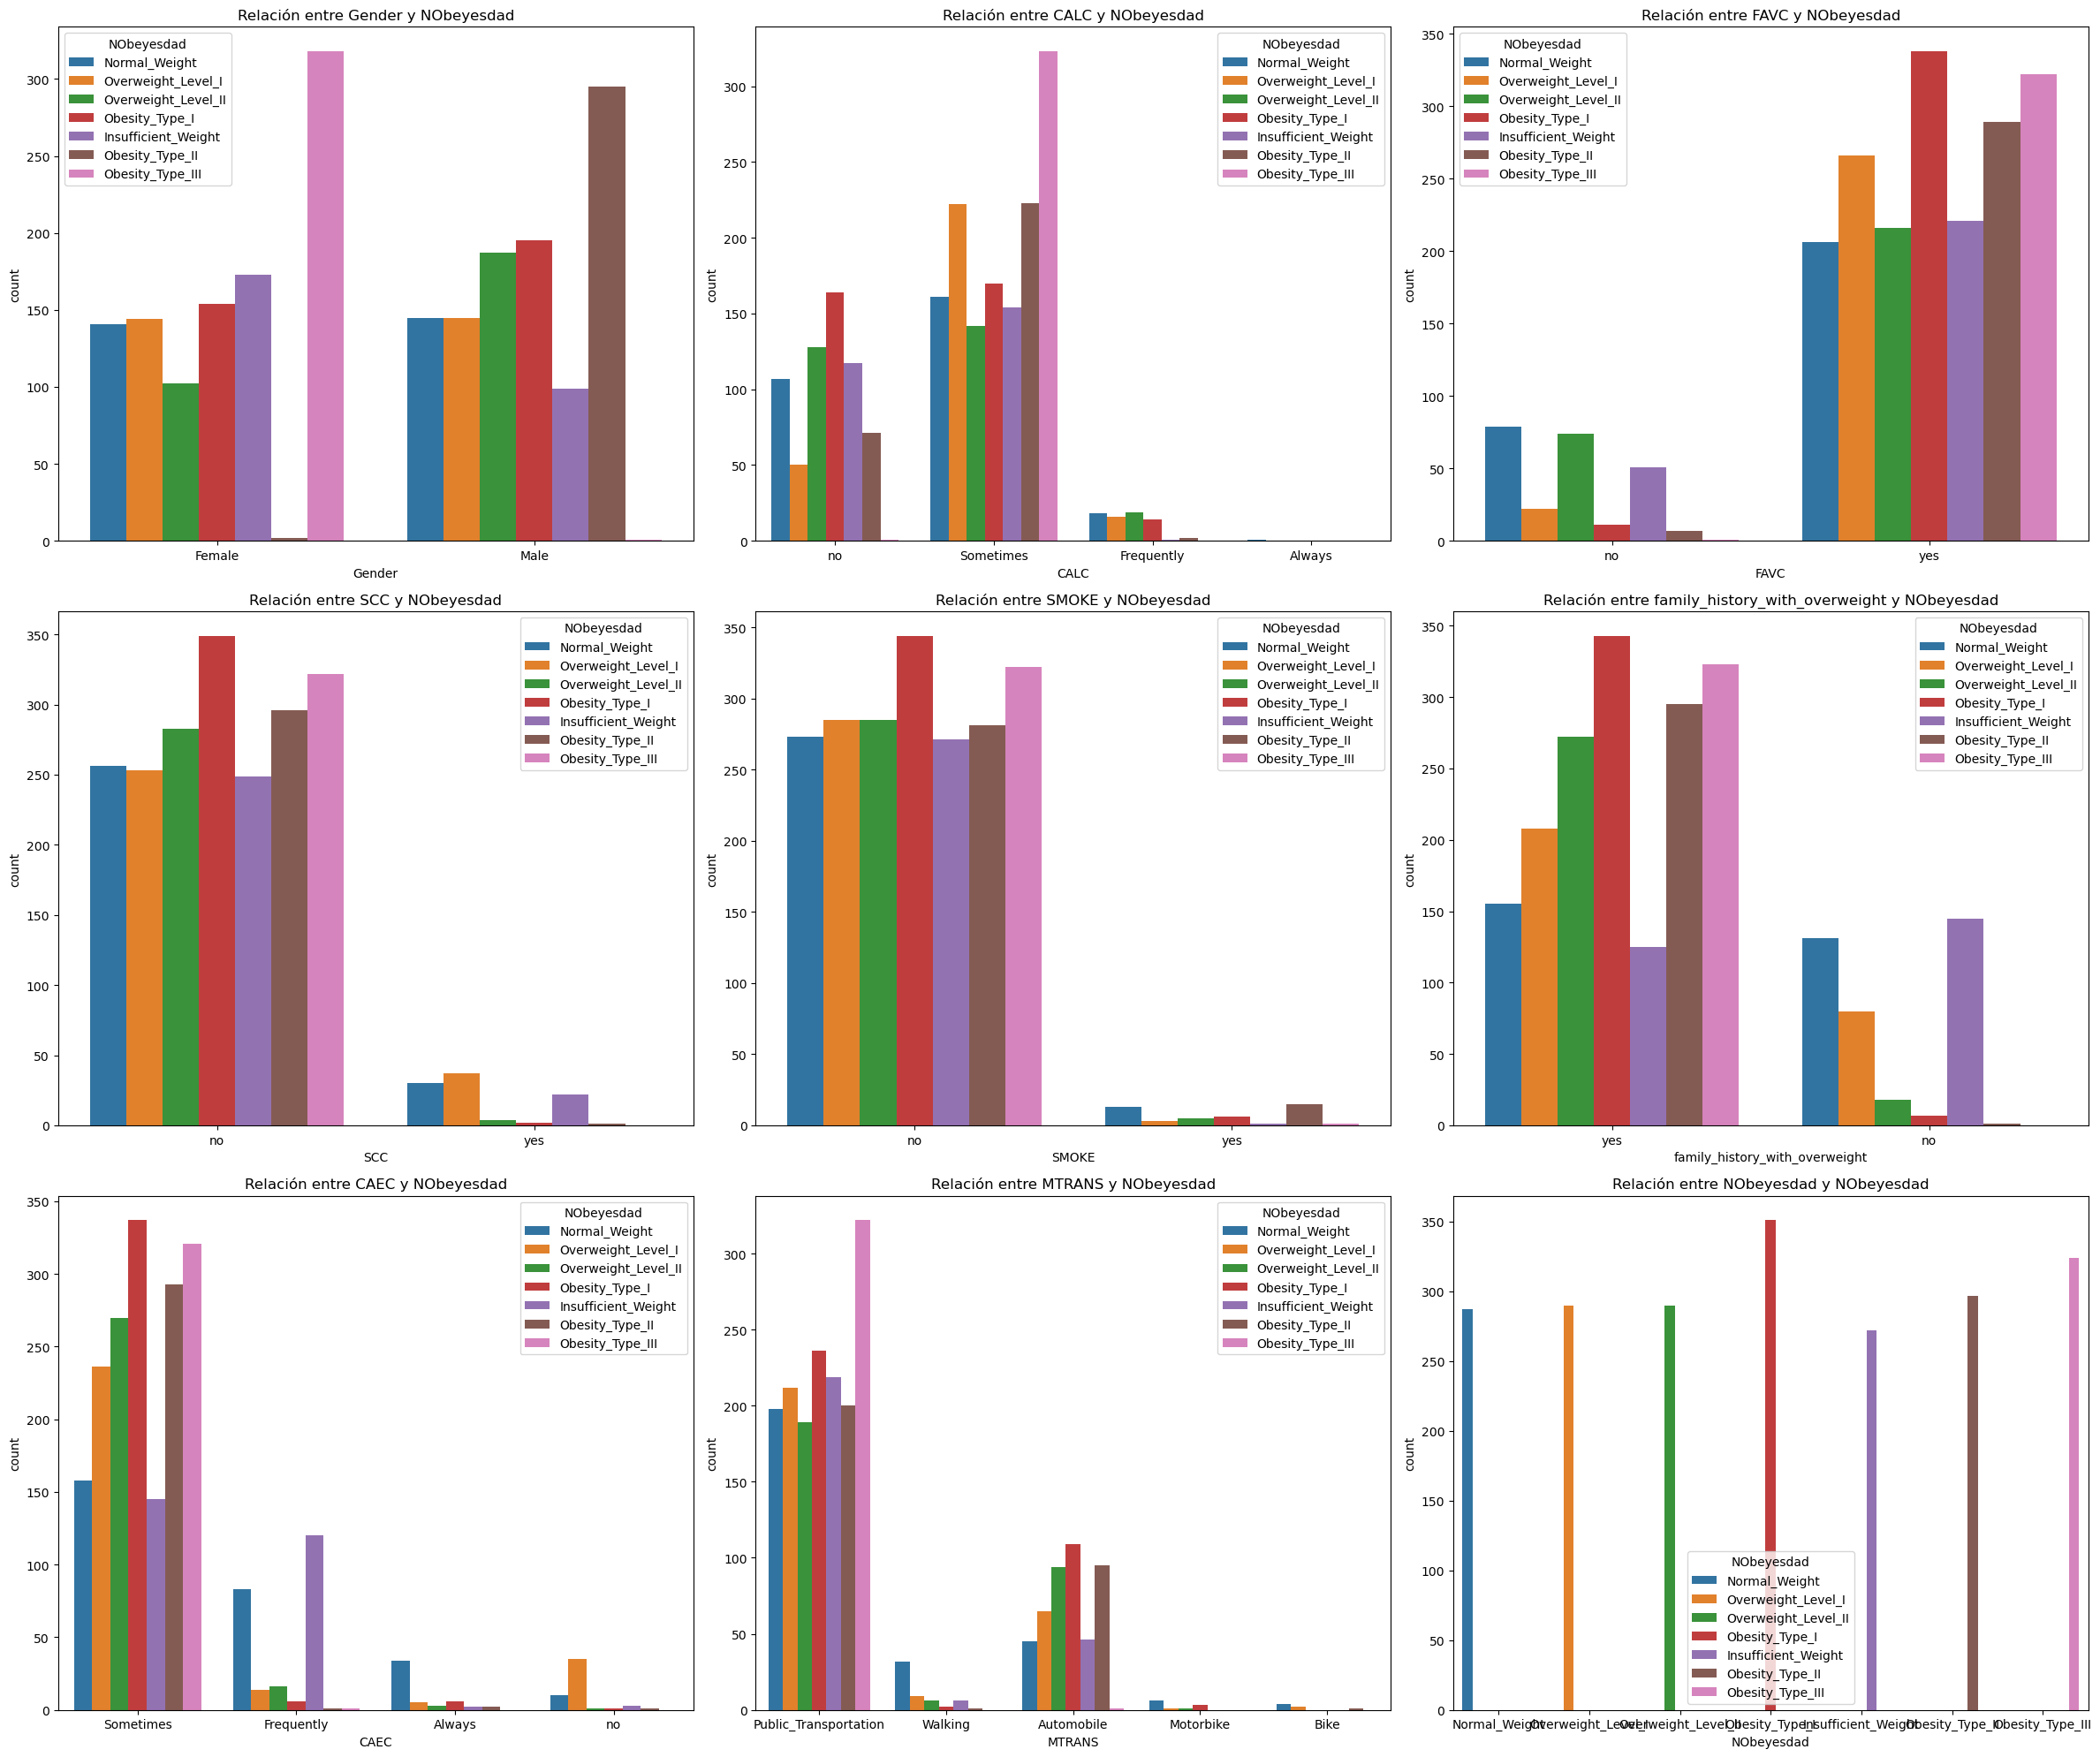

In [30]:
plt.figure(figsize=(24,20))

for i, var in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue='NObeyesdad', data=df)
    plt.title(f'Relación entre {var} y NObeyesdad')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

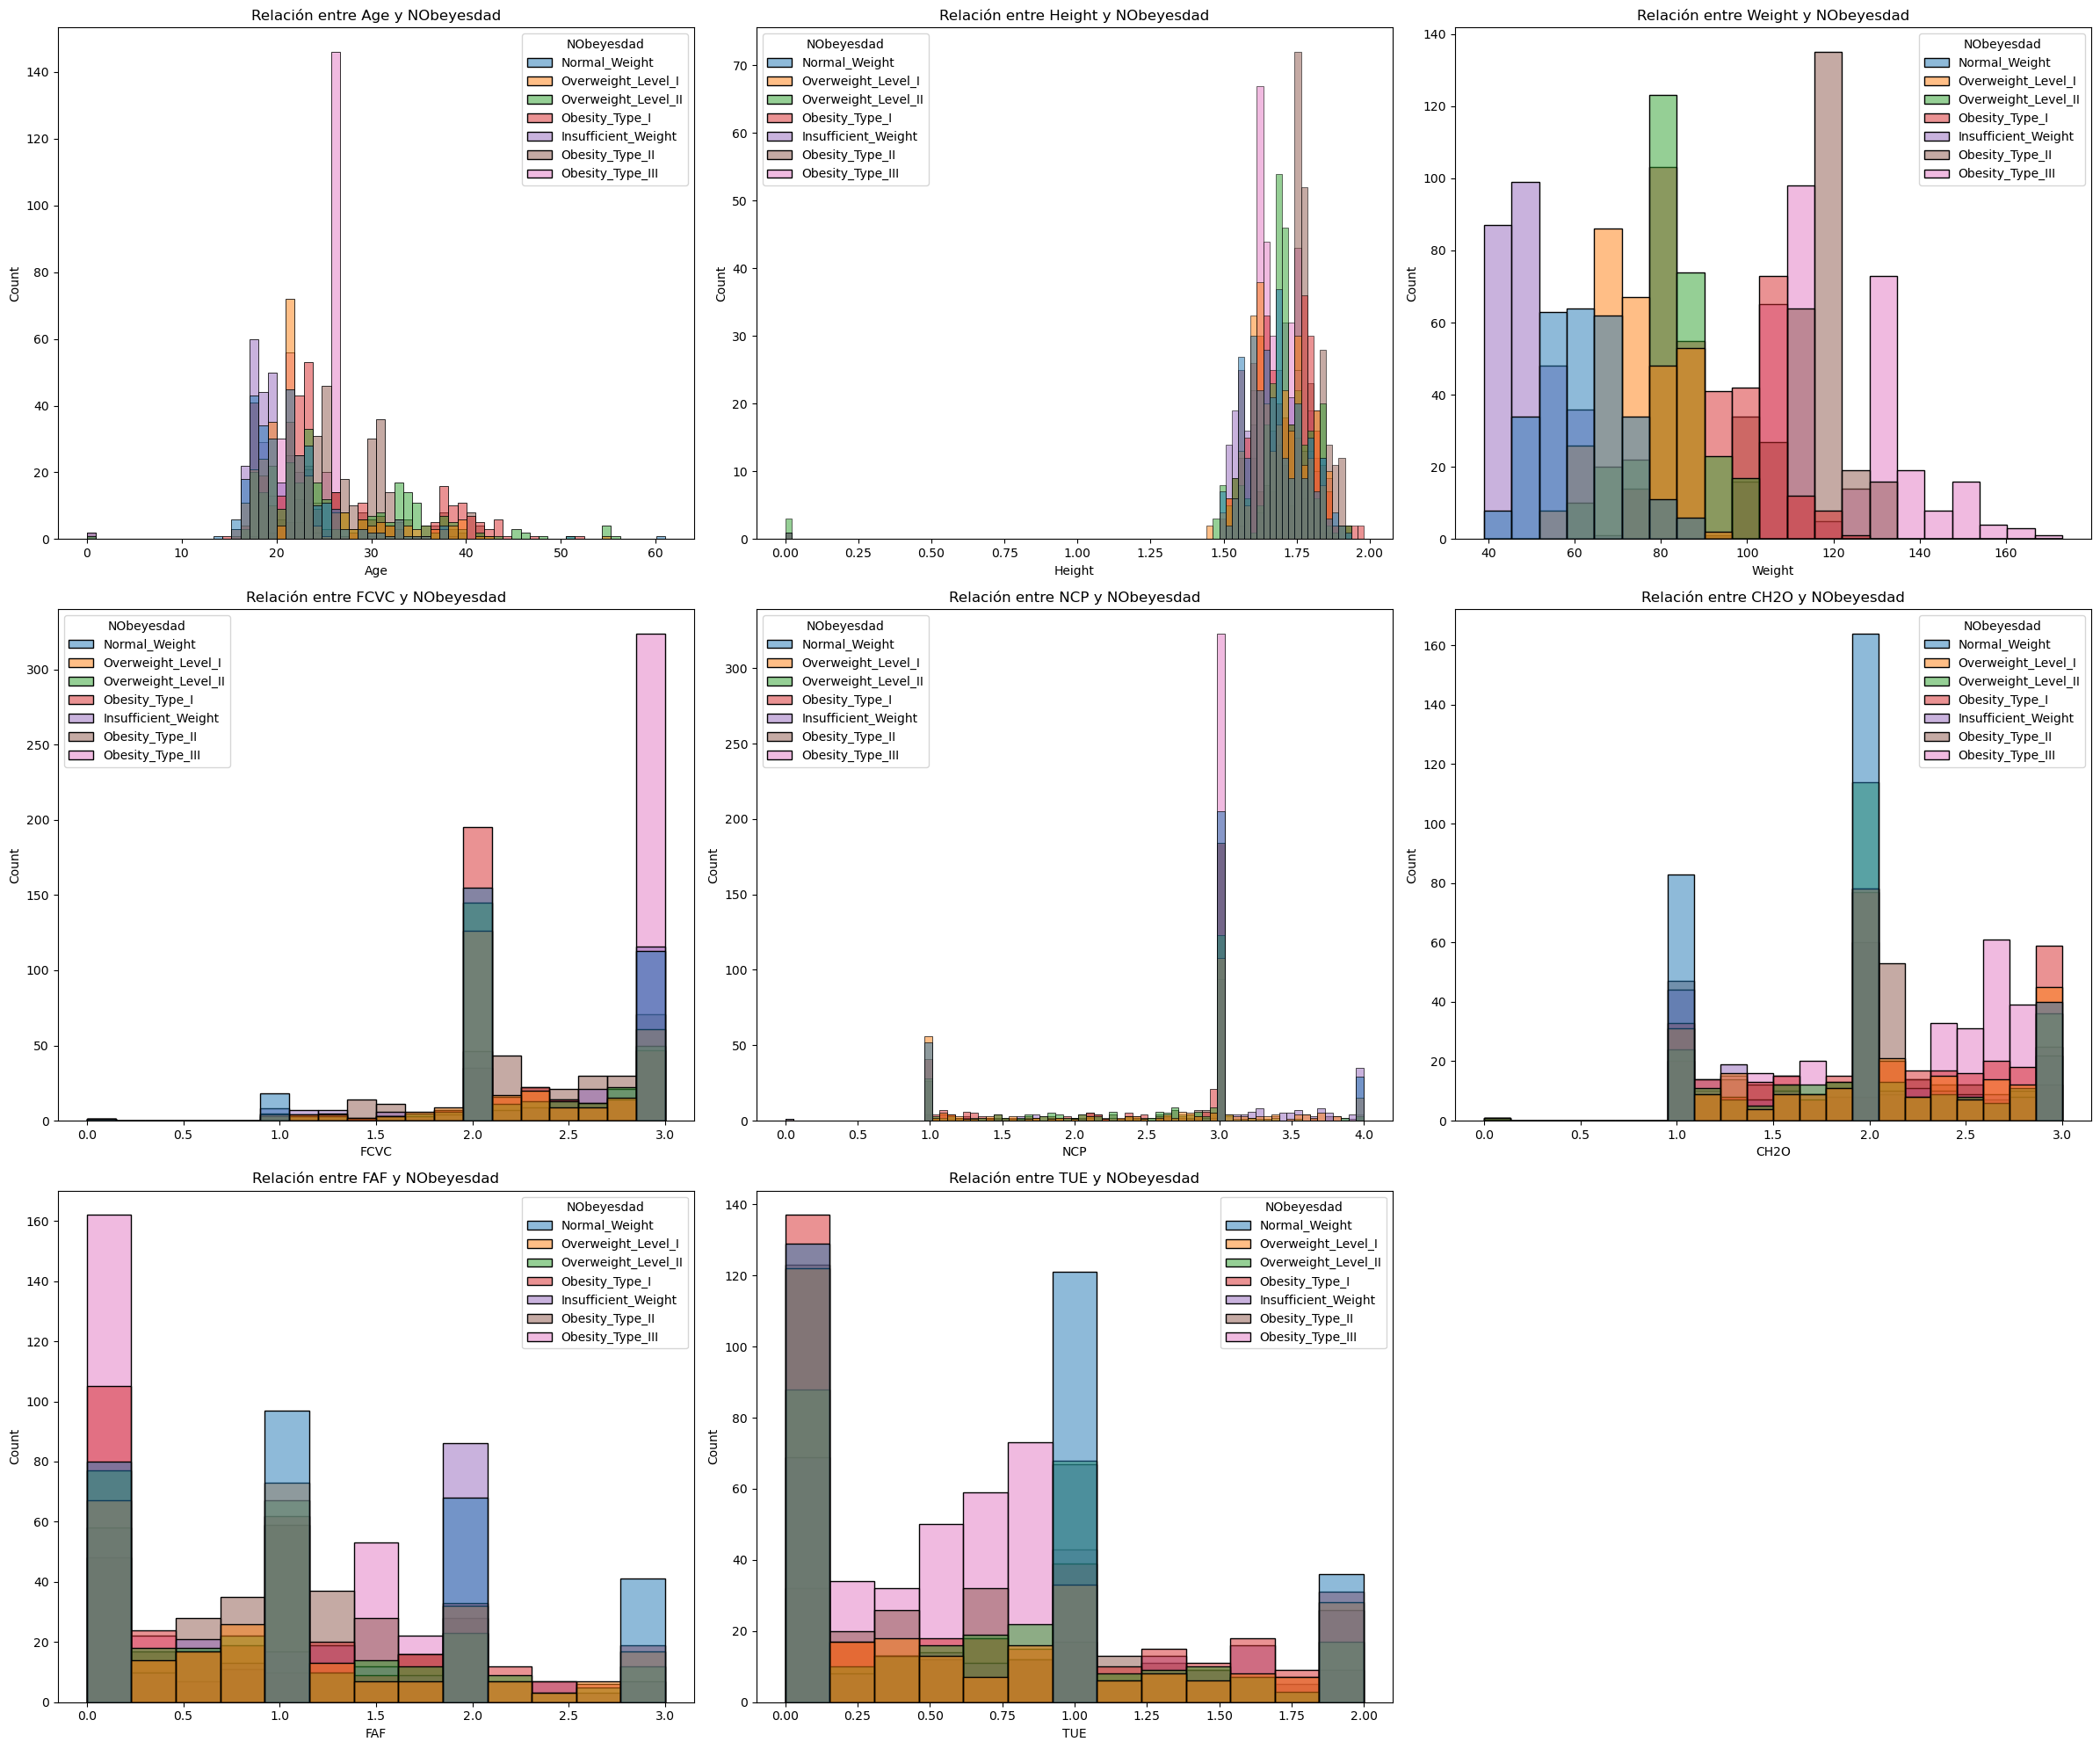

In [31]:
plt.figure(figsize=(24,20))

for i, var in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=var, hue='NObeyesdad', data=df)
    plt.title(f'Relación entre {var} y NObeyesdad')

plt.tight_layout()
plt.show

### Matriz de correlación

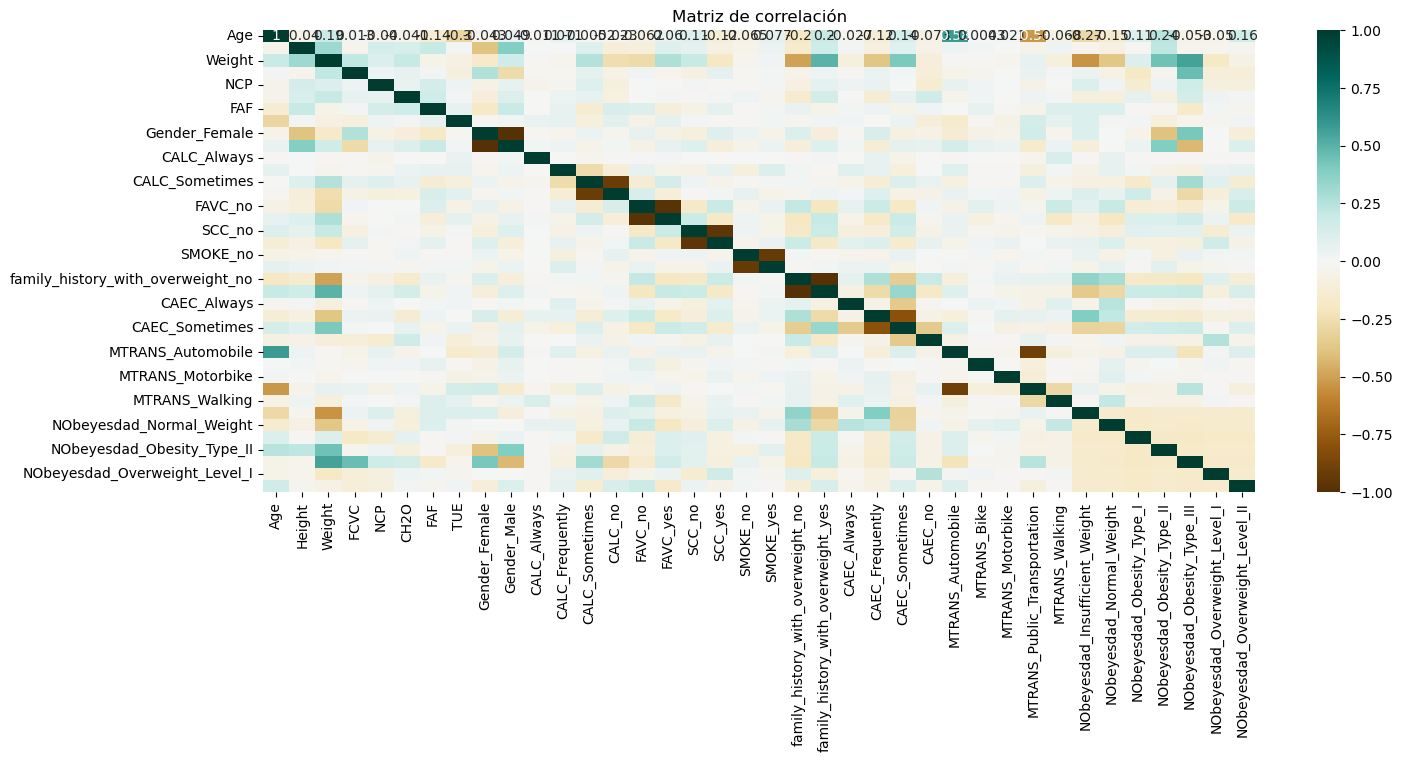

In [32]:
plt.figure(figsize=(16,6))
df_encoded = pd.get_dummies(df)
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)
heatmap.set_title('Matriz de correlación')
plt.show()

## Limpieza de datos

### Imputación de datos continuos

In [33]:
dataset = df

dataset['Age'].replace('', np.nan, inplace=True)
mean_age = (dataset['Age'][dataset['Age'].notnull() & (dataset['Age'] != 0)].astype(float).mean())
dataset['Age'] = dataset['Age'].replace(0, mean_age).fillna(mean_age).astype(int)

dataset['Height'].replace('', np.nan, inplace=True)
mean_height = (dataset['Height'][dataset['Height'].notnull() & (dataset['Height'] != 0)].mean())
dataset['Height'] = dataset['Height'].replace(0, mean_height).fillna(mean_height)

dataset['Weight'].replace('', np.nan, inplace=True)
mean_weight = (dataset['Weight'][dataset['Weight'].notnull() & (dataset['Weight'] != 0)].mean())
dataset['Weight'] = dataset['Weight'].replace(0, mean_weight).fillna(mean_weight)

dataset['FCVC'].replace('', np.nan, inplace=True)
mean_fcvc = dataset['FCVC'][dataset['FCVC'].notnull()].astype(float).mean()
dataset['FCVC'].fillna(mean_fcvc, inplace=True)

dataset['NCP'].replace('', np.nan, inplace=True)
mean_ncp = (dataset['NCP'][dataset['NCP'].notnull() & (dataset['NCP'] != 0)].astype(float).mean())
dataset['NCP'] = dataset['NCP'].replace(0, mean_ncp).fillna(mean_ncp).astype(int)

dataset['CH2O'].replace('', np.nan, inplace=True)
mean_ch2o = (dataset['CH2O'][dataset['CH2O'].notnull() & (dataset['CH2O'] != 0)].astype(float).mean())
dataset['CH2O'] = dataset['CH2O'].replace(0, mean_ch2o).fillna(mean_ch2o)

dataset['FAF'].replace('', np.nan, inplace=True)
mean_faf = dataset['FAF'][dataset['FAF'].notnull()].astype(float).mean()
dataset['FAF'].fillna(mean_faf, inplace=True)

dataset['TUE'].replace('', np.nan, inplace=True)
mean_tue = dataset['TUE'][dataset['TUE'].notnull()].astype(float).mean()
dataset['TUE'].fillna(mean_tue, inplace=True)


### Imputación datos categoricos

In [34]:
moda_gender = dataset['Gender'].mode()[0]
dataset['Gender'].fillna(moda_gender, inplace=True)

moda_calc = dataset['CALC'].mode()[0]
dataset['CALC'].fillna(moda_calc, inplace=True)

moda_favc = dataset['FAVC'].mode()[0]
dataset['FAVC'].fillna(moda_favc, inplace=True)

moda_scc = dataset['SCC'].mode()[0]
dataset['SCC'].fillna(moda_scc, inplace=True)

moda_smoke = dataset['SMOKE'].mode()[0]
dataset['SMOKE'].fillna(moda_smoke, inplace=True)

moda_family_hist = dataset['family_history_with_overweight'].mode()[0]
dataset['family_history_with_overweight'].fillna(moda_family_hist, inplace=True)

moda_caec = dataset['CAEC'].mode()[0]
dataset['CAEC'].fillna(moda_caec, inplace=True)

moda_mtrans = dataset['MTRANS'].mode()[0]
dataset['MTRANS'].fillna(moda_mtrans, inplace=True)


### Representación de la aplicación de los métodos de imputación

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              5
NCP                               0
SCC                               0
SMOKE                             0
CH2O           

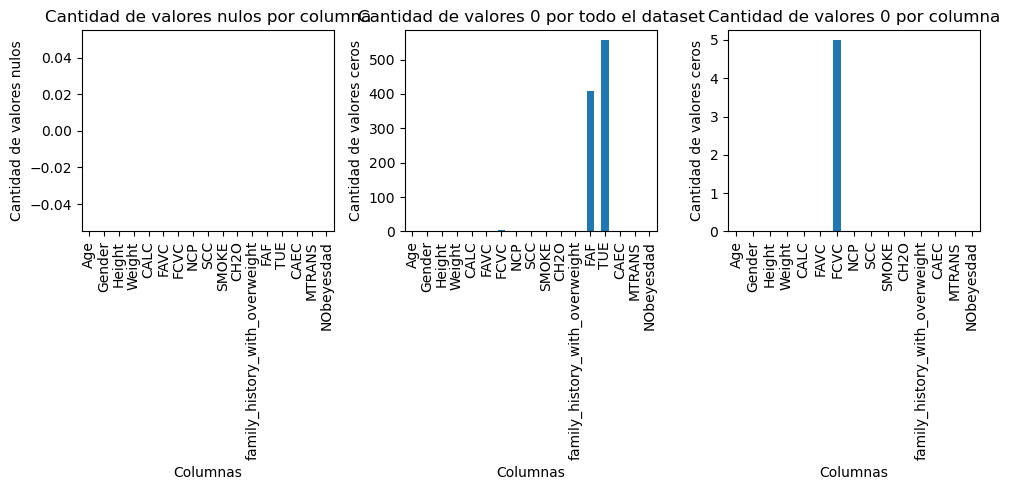

In [77]:
dataset.head()


null_values = dataset.isnull().sum()
no_eval_cols = ['TUE', 'FAF']
columnas_para_calcular = [col for col in dataset.columns if col not in no_eval_cols]
zero_values = (dataset[columnas_para_calcular] == 0).sum()
complete_zero_values = (dataset == 0).sum()
print(null_values)
print(zero_values)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

null_values.plot(kind='bar', ax=ax1)
ax1.set_title('Cantidad de valores nulos por columna')
ax1.set_xlabel('Columnas')
ax1.set_ylabel('Cantidad de valores nulos')

complete_zero_values.plot(kind='bar', ax=ax2)
ax2.set_title('Cantidad de valores 0 por todo el dataset')
ax2.set_xlabel('Columnas')
ax2.set_ylabel('Cantidad de valores ceros')

zero_values.plot(kind='bar', ax=ax3)
ax3.set_title('Cantidad de valores 0 por columna')
ax3.set_xlabel('Columnas')
ax3.set_ylabel('Cantidad de valores ceros')

plt.tight_layout()
plt.show()

### Valores extremos


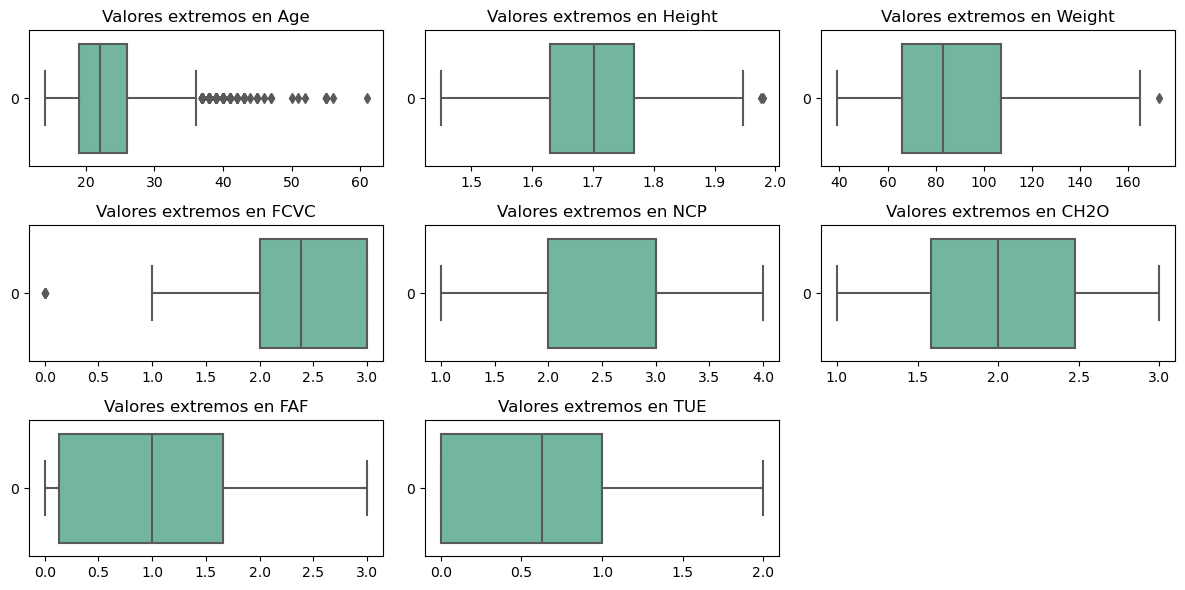

In [48]:
numeric_cols = [cols for cols in dataset if (dataset[cols].dtype == 'float64' or dataset[cols].dtype == 'int')]

plt.figure(figsize=(12,6))
for i, var in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=dataset[var], orient="h", palette="Set2")
    plt.title(f'Valores extremos en {var}')

plt.tight_layout()
plt.show()


### Conversión de datos categóricos a factor

In [78]:
for col in categorical_cols:
    dataset[col] = pd.factorize(dataset[col])[0]

##  Preparación conjunto de datos 

In [79]:

shuffle_data = dataset.sample(frac = 1)

X = shuffle_data.drop(columns=['NObeyesdad'])
y = shuffle_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Modelo no supervisado

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


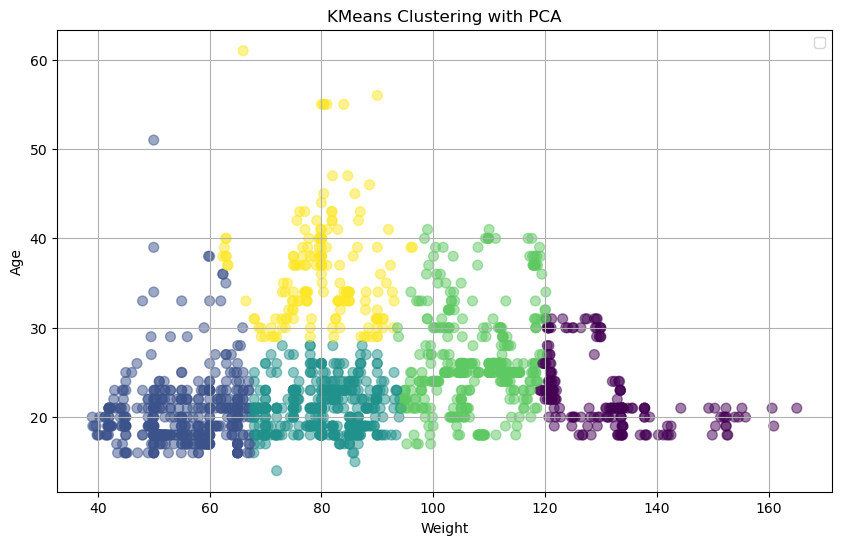

In [80]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X_train_pca)

cluster_labels = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(X_train['Weight'], X_train['Age'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering with PCA')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
wcss = kmeans.inertia_
print("WCSS", wcss)


WCSS 123799.09270877762


##  Modelo supervisado

In [82]:

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


y_pred_tree = decision_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy_tree:.2f}')


print(classification_report(y_test, y_pred_tree))


conf_matrix = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusión del árbol de decisión:")
print(conf_matrix)


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        44
           1       0.92      0.85      0.88        67
           2       0.82      0.86      0.84        59
           3       0.92      0.87      0.89        78
           4       0.92      0.95      0.93        58
           5       0.94      0.96      0.95        51
           6       1.00      0.97      0.98        66

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.91      0.90      0.90       423

Matriz de confusión del árbol de decisión:
[[38  1  0  0  5  0  0]
 [ 7 57  3  0  0  0  0]
 [ 1  4 51  3  0  0  0]
 [ 0  0  8 68  0  2  0]
 [ 3  0  0  0 55  0  0]
 [ 0  0  0  2  0 49  0]
 [ 0  0  0  1  0  1 64]]


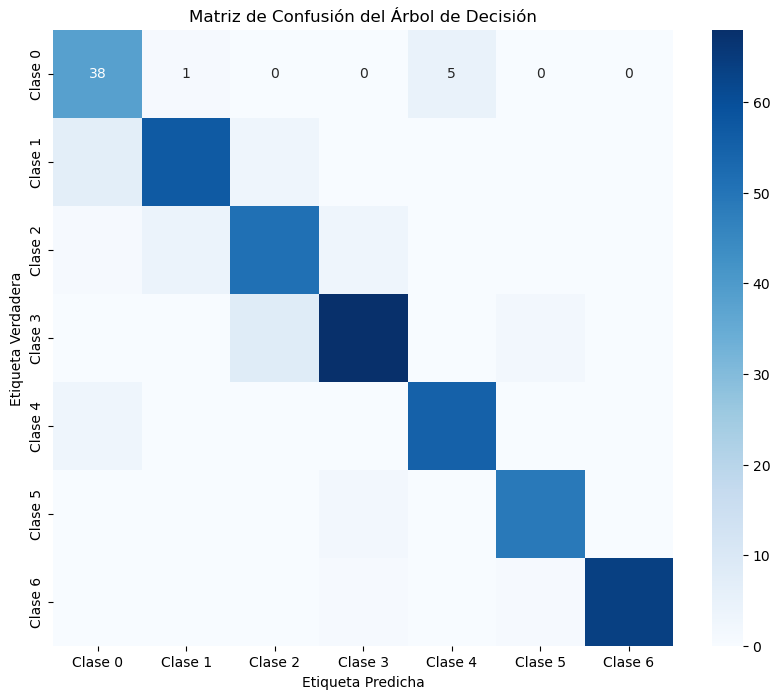

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase " + str(i) for i in range(7)], yticklabels=["Clase " + str(i) for i in range(7)])
plt.title("Matriz de Confusión del Árbol de Decisión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

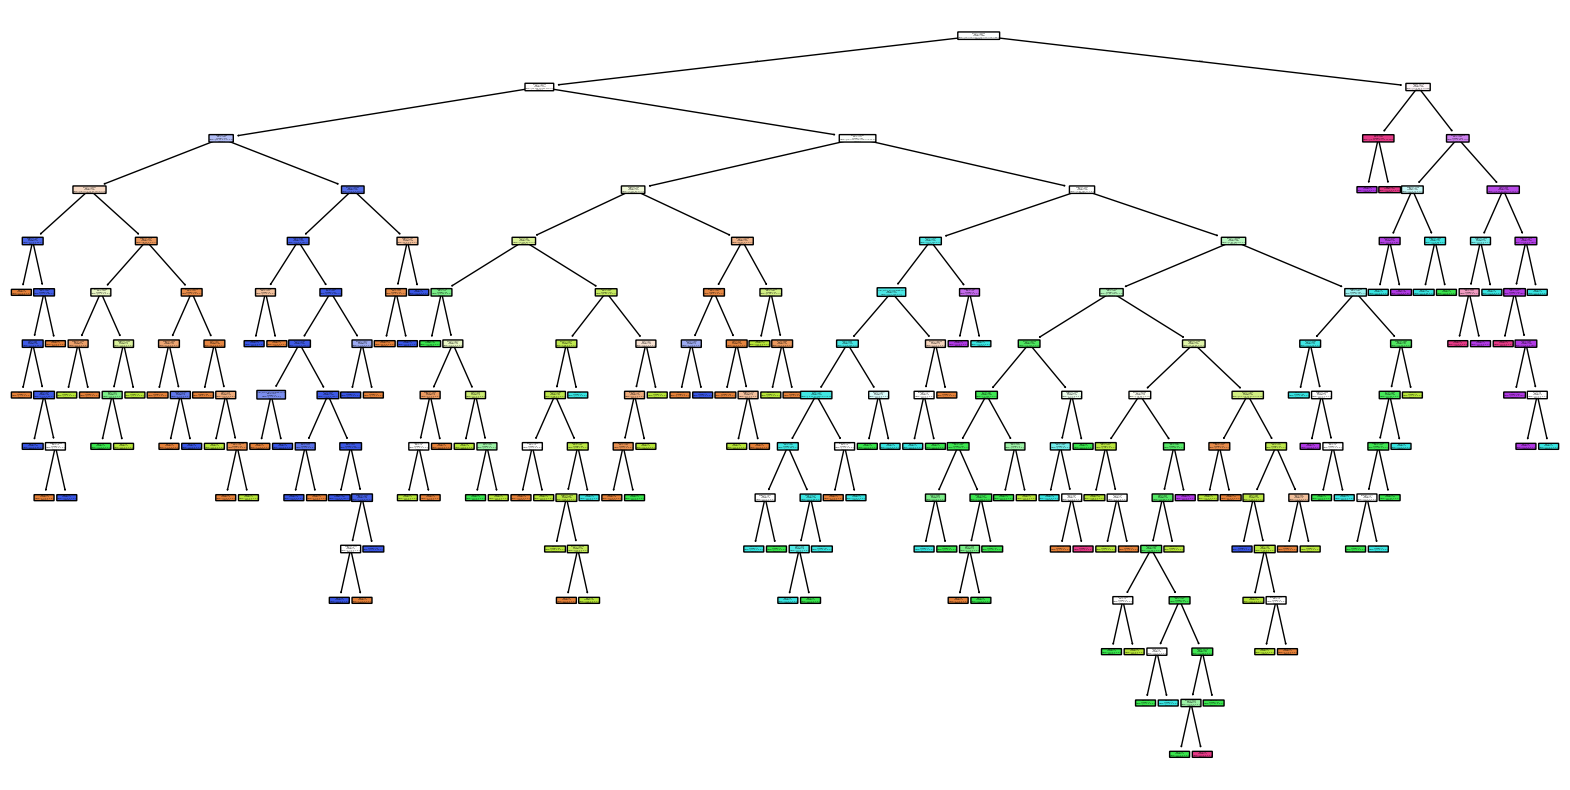

In [84]:
plt.figure(figsize=(20, 10))

plot_tree(decision_tree_model, feature_names=X.columns, class_names=[str(c) for c in decision_tree_model.classes_], 
            filled=True, rounded=True)

plt.show()